<a href="https://colab.research.google.com/github/salsaadityani/visualization-geospatial/blob/main/Geospasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install geoplot

In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
from google.colab import drive
import os

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/geo')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
map = gpd.read_file('idn_admbnda_adm1_bps_20200401.shp')
map.rename(columns = {"ADM1_EN":"Provinsi"}, inplace = True)
map['Provinsi'].replace({"Dki Jakarta":"DKI Jakarta"},inplace=True)
map
#map.plot()

,Shape_Leng,Shape_Area,Provinsi,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."
5,3.123689,0.053426,DKI Jakarta,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ..."
6,11.013243,0.977600,Gorontalo,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0..."
7,11.835073,3.977711,Jambi,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ..."
8,11.605868,3.032785,Jawa Barat,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ..."
9,15.452527,2.819838,Jawa Tengah,ID33,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [ ]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13014 non-null  object 
 1   Location ISO Code            13014 non-null  object 
 2   Location                     13014 non-null  object 
 3   New Cases                    13014 non-null  int64  
 4   New Deaths                   13014 non-null  int64  
 5   New Recovered                13014 non-null  int64  
 6   New Active Cases             13014 non-null  int64  
 7   Total Cases                  13014 non-null  int64  
 8   Total Deaths                 13014 non-null  int64  
 9   Total Recovered              13014 non-null  int64  
 10  Total Active Cases           13014 non-null  int64  
 11  Location Level               13014 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
df = data.drop_duplicates(subset='Location', keep="last")

df.rename(columns={
    'Location':'Provinsi'
},inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Location ISO Code,Provinsi,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
12979,3/28/2021,ID-AC,Aceh,12,0,18,-6,9845,395,8048,1402,Province,NaN,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,2.29,1876.22,0.00,75.28,4.01%,81.75%,0.57,0.00
12980,3/28/2021,ID-BA,Bali,121,3,0,118,39171,975,35362,2834,Province,NaN,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,28.70,9290.66,0.71,231.25,2.49%,90.28%,0.83,1.00
12981,3/28/2021,ID-BT,Banten,79,0,18,61,36162,646,28983,6533,Province,NaN,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,7.37,3372.57,0.00,60.25,1.79%,80.15%,0.36,1.00
12982,3/28/2021,ID-BE,Bengkulu,27,0,0,27,5364,154,4974,236,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,13.50,2682.62,0.00,77.02,2.87%,92.73%,5.40,1.00
12983,3/28/2021,ID-JK,DKI Jakarta,1470,23,1175,272,379691,6316,365600,7775,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,135.53,35007.00,2.12,582.33,1.66%,96.29%,1.09,1.28
12984,3/28/2021,ID-YO,Daerah Istimewa Yogyakarta,127,4,132,-9,32811,791,26837,5183,Province,NaN,Daerah Istimewa Yogyakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,34.98,9036.32,1.10,217.85,2.41%,81.79%,0.91,0.44
12985,3/28/2021,ID-GO,Gorontalo,8,0,0,8,5119,145,4792,182,Province,NaN,Gorontalo,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,6.78,4335.74,0.00,122.81,2.83%,93.61%,1.00,0.00
12986,3/28/2021,IDN,Indonesia,4083,85,4279,-281,1496085,40449,1331400,124236,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,15.40,5641.65,0.32,152.53,2.70%,88.99%,0.92,0.43
12987,3/28/2021,ID-JA,Jambi,53,0,12,41,6132,94,4967,1071,Province,NaN,Jambi,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,15.17,1755.33,0.00,26.91,1.53%,81.00%,1.18,0.00
12988,3/28/2021,ID-JB,Jawa Barat,534,4,766,-236,246788,3137,219475,24176,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,11.82,5464.59,0.09,69.46,1.27%,88.93%,1.12,0.04


In [ ]:
map_covid = map.merge(df.sort_values(by='Provinsi'),on='Provinsi')

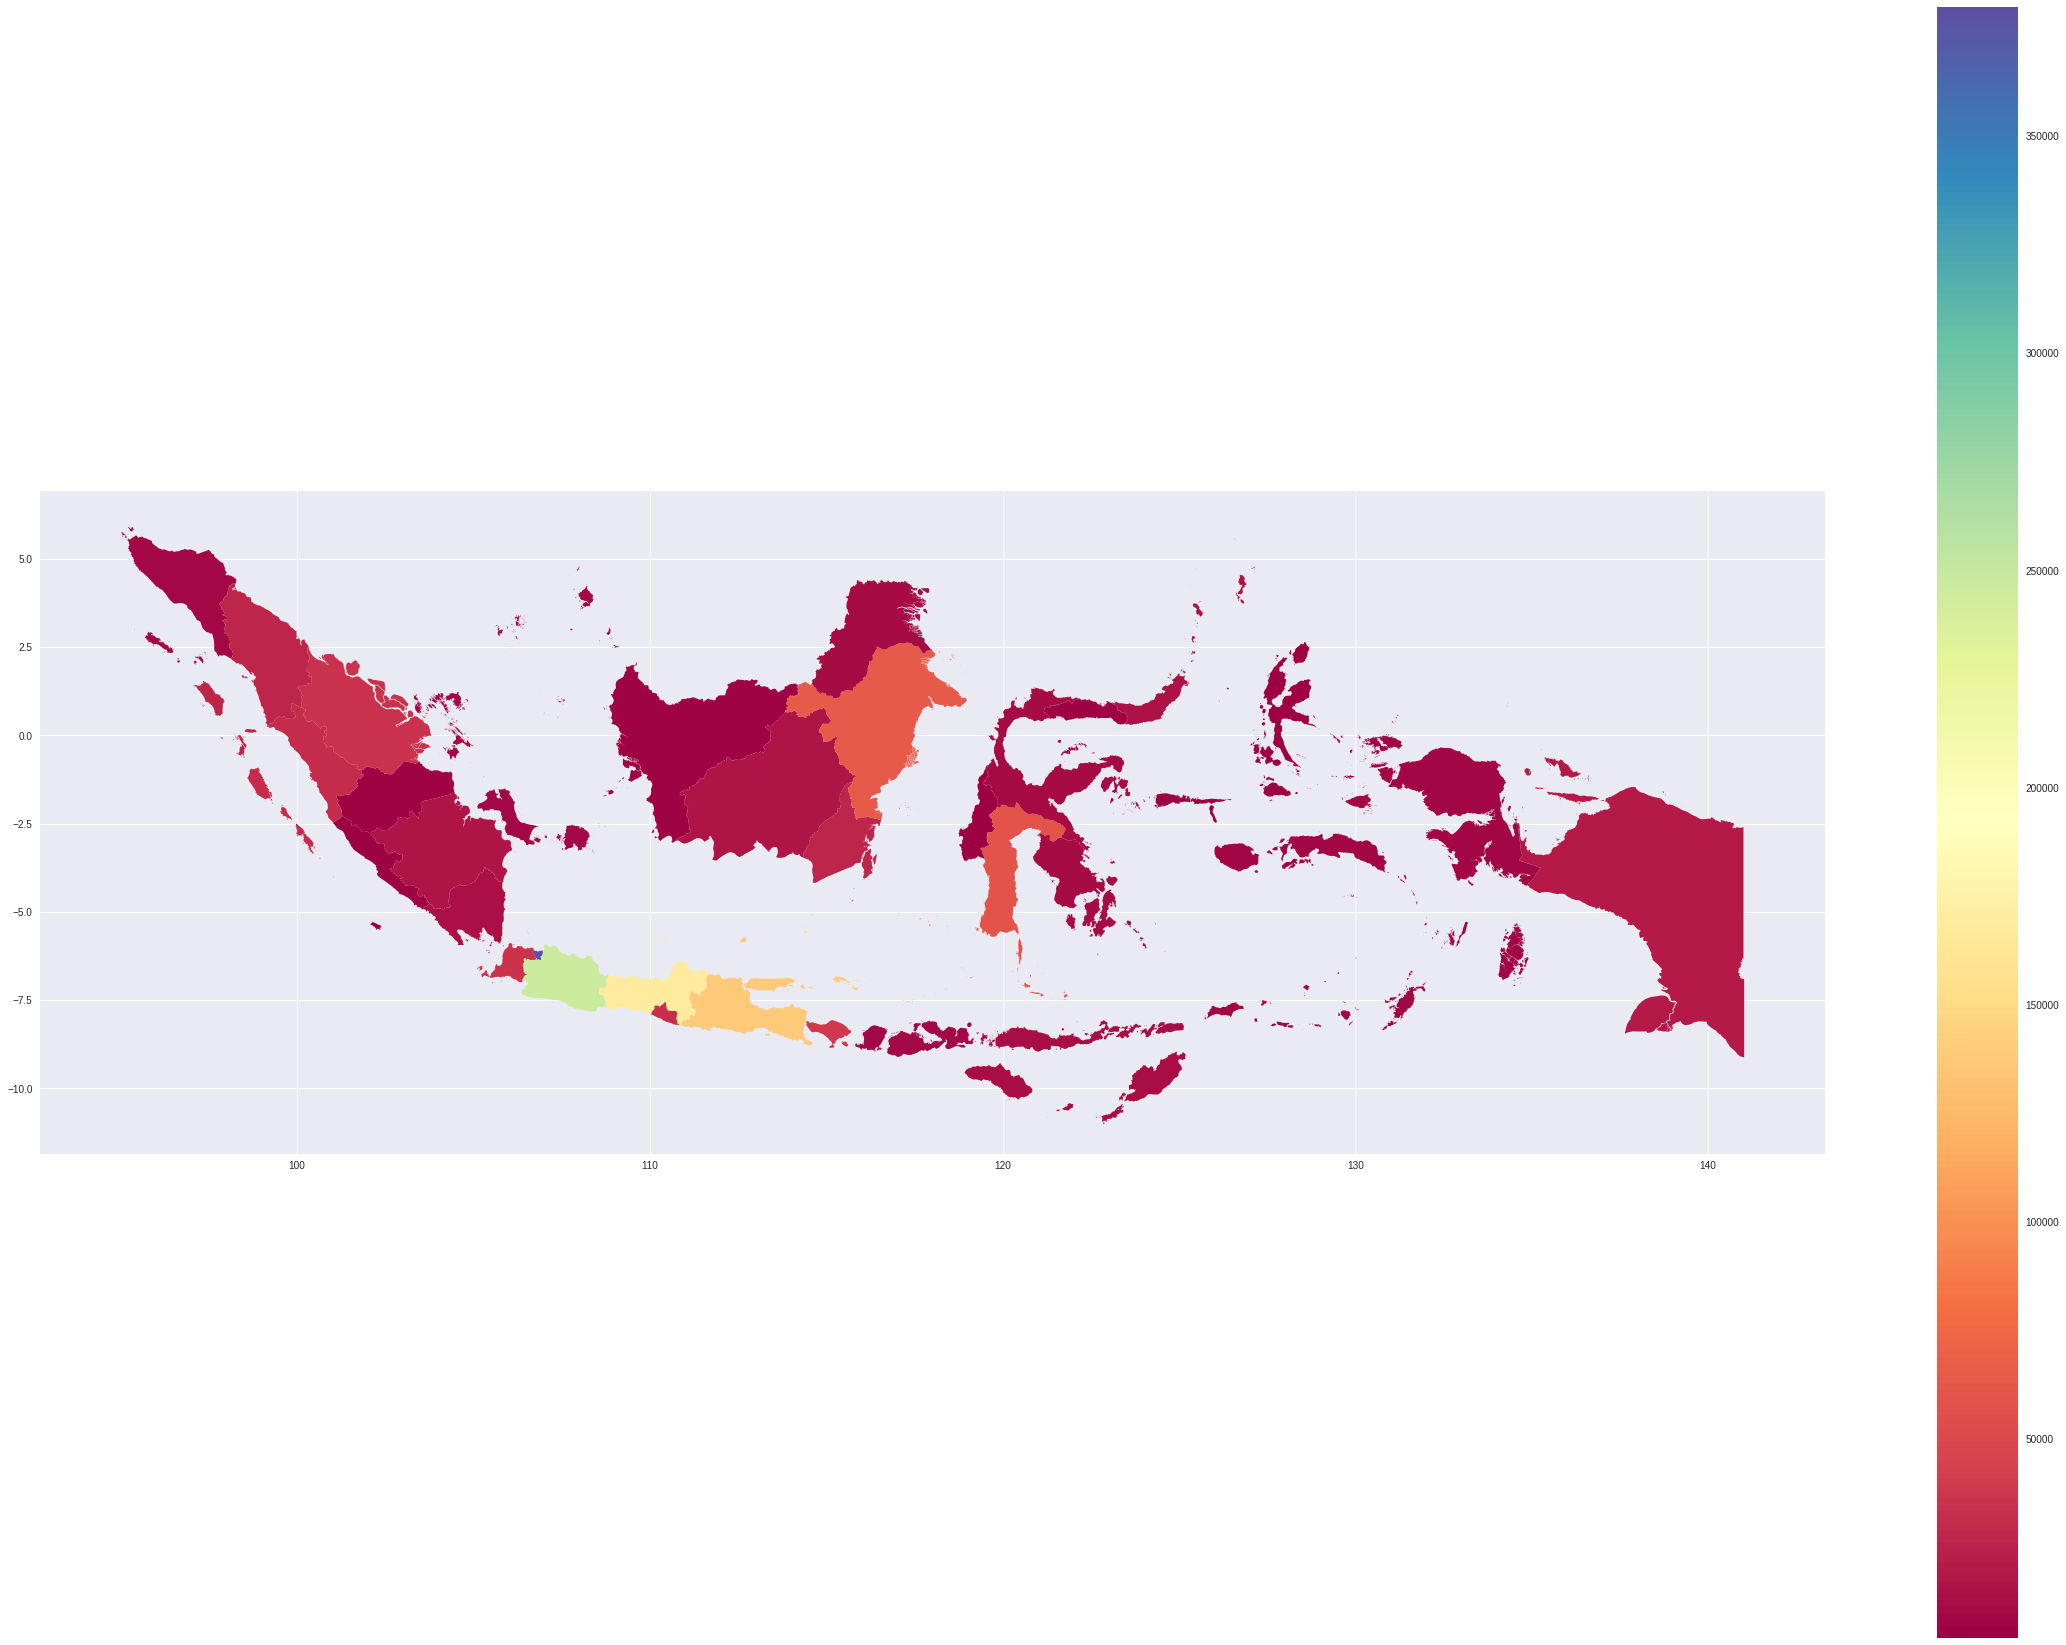

In [ ]:
plt.style.use('seaborn')
map_covid.plot(figsize=(40,30), column='Total Cases', cmap='Spectral',legend=True)